In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("C:/Users/NIKUNJ KIKANI/Desktop/machine learning/pipeline/Book2.csv",usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print("without binnig:",accuracy_score (y_test , y_pred))

without binnig: 0.6293706293706294


In [9]:
np.mean(cross_val_score(clf,x,y,scoring="accuracy"))

0.6148527528809219

In [10]:
kbin_age = KBinsDiscretizer(n_bins=10 , encode="ordinal",strategy="quantile")
kbin_fare = KBinsDiscretizer(n_bins=10 , encode="ordinal",strategy="quantile")

In [11]:
trf = ColumnTransformer([
    ("first",kbin_age,[0]),
    ("secound",kbin_fare,[1])
])

In [12]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf  = trf.fit_transform(x_test)

In [13]:
trf.named_transformers_['secound'].bin_edges_

array([array([  0.     ,   7.74336,   7.925  ,   8.6625 ,  10.5    ,  14.4542 ,
               22.62   ,  28.39   ,  38.1    ,  57.78336, 512.3292 ])          ],
      dtype=object)

In [14]:
output = pd.DataFrame({
    "age":x_train['Age'],
    "age_trf":x_train_trf[:,0],
    "fare":x_train['Fare'],
    "Fare_trf":x_train_trf[:,1]
})

In [15]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['secound'].bin_edges_[0].tolist())

In [16]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred = clf.predict(x_test_trf)

In [17]:
accuracy_score(y_test,y_pred)

0.6853146853146853

In [18]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy"))

0.6330985915492958

In [19]:
def discretize(bins,strategy):
    KBin_age = KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)
    KBin_fare= KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)
    
    trf = ColumnTransformer([
        ("first",kbin_age,[0]),
        ("secound",kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy")))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color="red")
    plt.title("After")
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("after")
    
    plt.show() 

0.6359350547730829


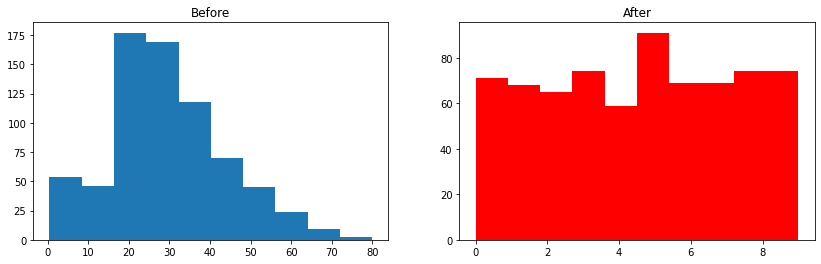

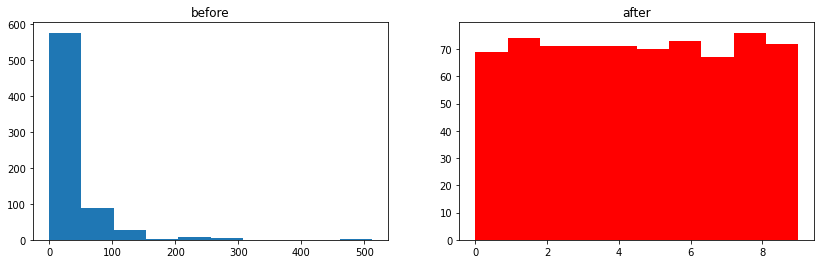

In [20]:
discretize(10,"binning")